# K - Means

**Important Parameters**

**Relevant Information**

## Implementation

Let's work with Iris Dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [2]:
#Load the dataset 
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = iris.target
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target"]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
kmeans_2 = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(df[["sepal_length", "petal_width"]])
kmeans_3 = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df[["sepal_length", "petal_width"]])
df["clusters_2"] = kmeans_2.labels_ 
df["clusters_3"] = kmeans_3.labels_ 
df

,sepal_length,sepal_width,petal_length,petal_width,target,clusters_2,clusters_3
0,5.1,3.5,1.4,0.2,0,0,2
1,4.9,3.0,1.4,0.2,0,0,2
2,4.7,3.2,1.3,0.2,0,0,2
3,4.6,3.1,1.5,0.2,0,0,2
4,5.0,3.6,1.4,0.2,0,0,2
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1,1
146,6.3,2.5,5.0,1.9,2,1,1
147,6.5,3.0,5.2,2.0,2,1,1
148,6.2,3.4,5.4,2.3,2,1,1


In [7]:
kmeans_3.cluster_centers_


array([[5.89259259, 1.46296296],
       [6.85714286, 2.01190476],
       [5.00555556, 0.3037037 ]])

In [9]:
kmeans_3.cluster_centers_[0]


array([5.89259259, 1.46296296])

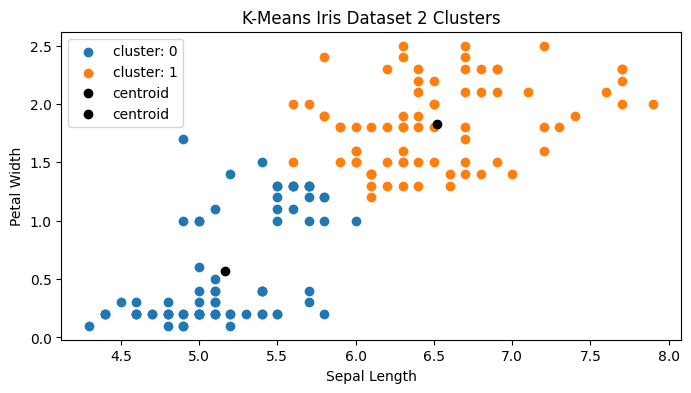

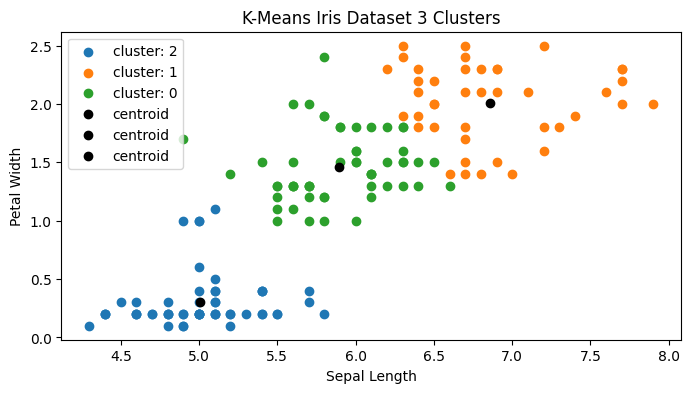

In [14]:
plt.figure(figsize=(8,4))
for c in df.clusters_2.unique():
    df_loc = df.loc[df.clusters_2 == c].copy()
    plt.scatter(df_loc.sepal_length, df_loc.petal_width, label = f'cluster: {c}')
for i in range(2):
    plt.scatter(kmeans_2.cluster_centers_[i][0], kmeans_2.cluster_centers_[i][1], color = "black", label = "centroid")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.title("K-Means Iris Dataset 2 Clusters")
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
for c in df.clusters_3.unique():
    df_loc = df.loc[df.clusters_3 == c].copy()
    plt.scatter(df_loc.sepal_length, df_loc.petal_width, label = f'cluster: {c}')
for i in range(3):
    plt.scatter(kmeans_3.cluster_centers_[i][0], kmeans_3.cluster_centers_[i][1], color = "black", label = "centroid")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.title("K-Means Iris Dataset 3 Clusters")
plt.legend()
plt.show()

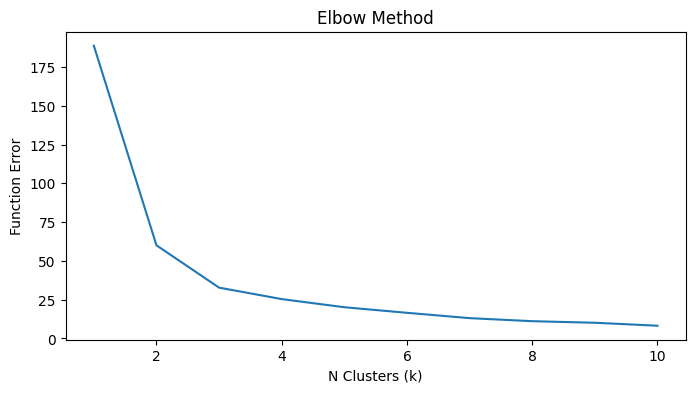

In [25]:
error_list = []
k_list = [1,2,3,4,5,6,7,8,9,10]
for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(df[["sepal_length", "petal_width"]])
    error_list.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(k_list, error_list)
plt.xlabel("N Clusters (k)")
plt.ylabel("Function Error")
plt.title("Elbow Method")
plt.savefig("img/elbow_method_k_means.png", dpi = 300, bbox_inches='tight')
plt.show()

,sepal_length,sepal_width,petal_length,petal_width,target,clusters
0,5.1,3.5,1.4,0.2,0,2
1,4.9,3.0,1.4,0.2,0,2
2,4.7,3.2,1.3,0.2,0,2
3,4.6,3.1,1.5,0.2,0,2
4,5.0,3.6,1.4,0.2,0,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


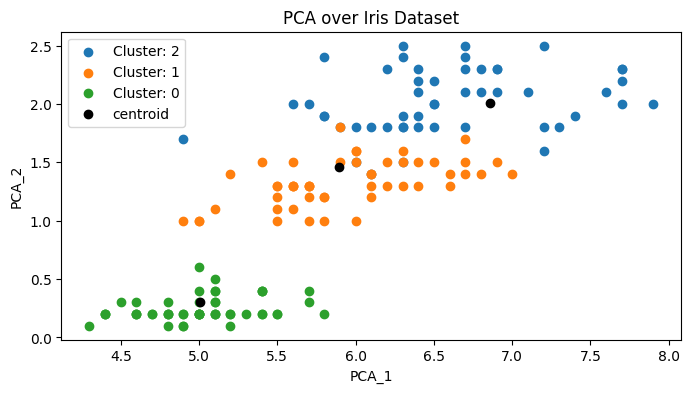

In [30]:
plt.figure(figsize=(8,4))
for c in df.clusters.unique():
    df_loc = df.loc[df.target == c].copy()
    plt.scatter(df_loc.sepal_length, df_loc.petal_width, label = f'cluster: {c}')
plt.scatter(kmeans.cluster_centers_[: , 0], kmeans.cluster_centers_[: ,1], color = "black", label = "centroid")
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.title("PCA over Iris Dataset")
plt.legend()
plt.savefig("img/pca_over_iris.png", dpi = 300, bbox_inches='tight')
plt.show()